In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from importlib import reload
import statsmodels.api as sm
import operator
import plotting
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

## Retrieving Data

In [3]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

### List of Stocks

In [4]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: AAPL AMZN CSCO EA EBAY FB GOOG IBM INTC MSFT NFLX NVDA ORCL QCOM SHOP TSLA TWTR VMW 

In [5]:
stocks['tsla'].head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2010-07-28  20.549999  20.900000  20.510000  20.719999  20.719999   467200   
2010-07-29  20.770000  20.879999  20.000000  20.350000  20.350000   616000   
2010-07-30  20.200001  20.440001  19.549999  19.940001  19.940001   426900   
2010-08-02  20.500000  20.969999  20.330000  20.920000  20.920000   718100   
2010-08-03  21.000000  21.950001  20.820000  21.950001  21.950001  1230500   

            Return    Change  Volatility        MA7       MA21   Momentum  \
Date                                                                        
2010-07-28   0.008  0.170000    1.979836  20.718571  19.911904  18.290001   
2010-07-29  -0.020 -0.369999    1.908327  20.725714  19.743333  17.950001   
2010-07-30  -0.013 -0.409999    1.839567  20.685714  19.558095  17.549999   
2010-08-02   0.020  0.979999    1.789358  20.674286  19.508571  17.719999   
2010-08-03   0.045  1.030001    1.791139  20.768572  19.639524  17.350000   

                  RSI      MACD    Signal  Upper_band  Lower_band  
Date                                                               
2010-07-28  41.752948 -0.350607 -0.658177   24.403824   15.419985  
2010-07-29  40.449222 -0.337599 -0.594062   23.858103   15.628563  
2010-07-30  38.996148 -0.356267 -0.546503   23.226171   15.890019  
2010-08-02  44.159747 -0.288656 -0.494933   23.066887   15.950255  
2010-08-03  49.041837 -0.150230 -0.425993   23.349330   15.929718

## Check for Correlation

In [6]:
stocks['tsla'].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

Return
Return     1.000000
Change     0.643410
RSI        0.282943
Close      0.029047
Adj Close  0.029047

`Return` correlated with `Change` and `RSI`.

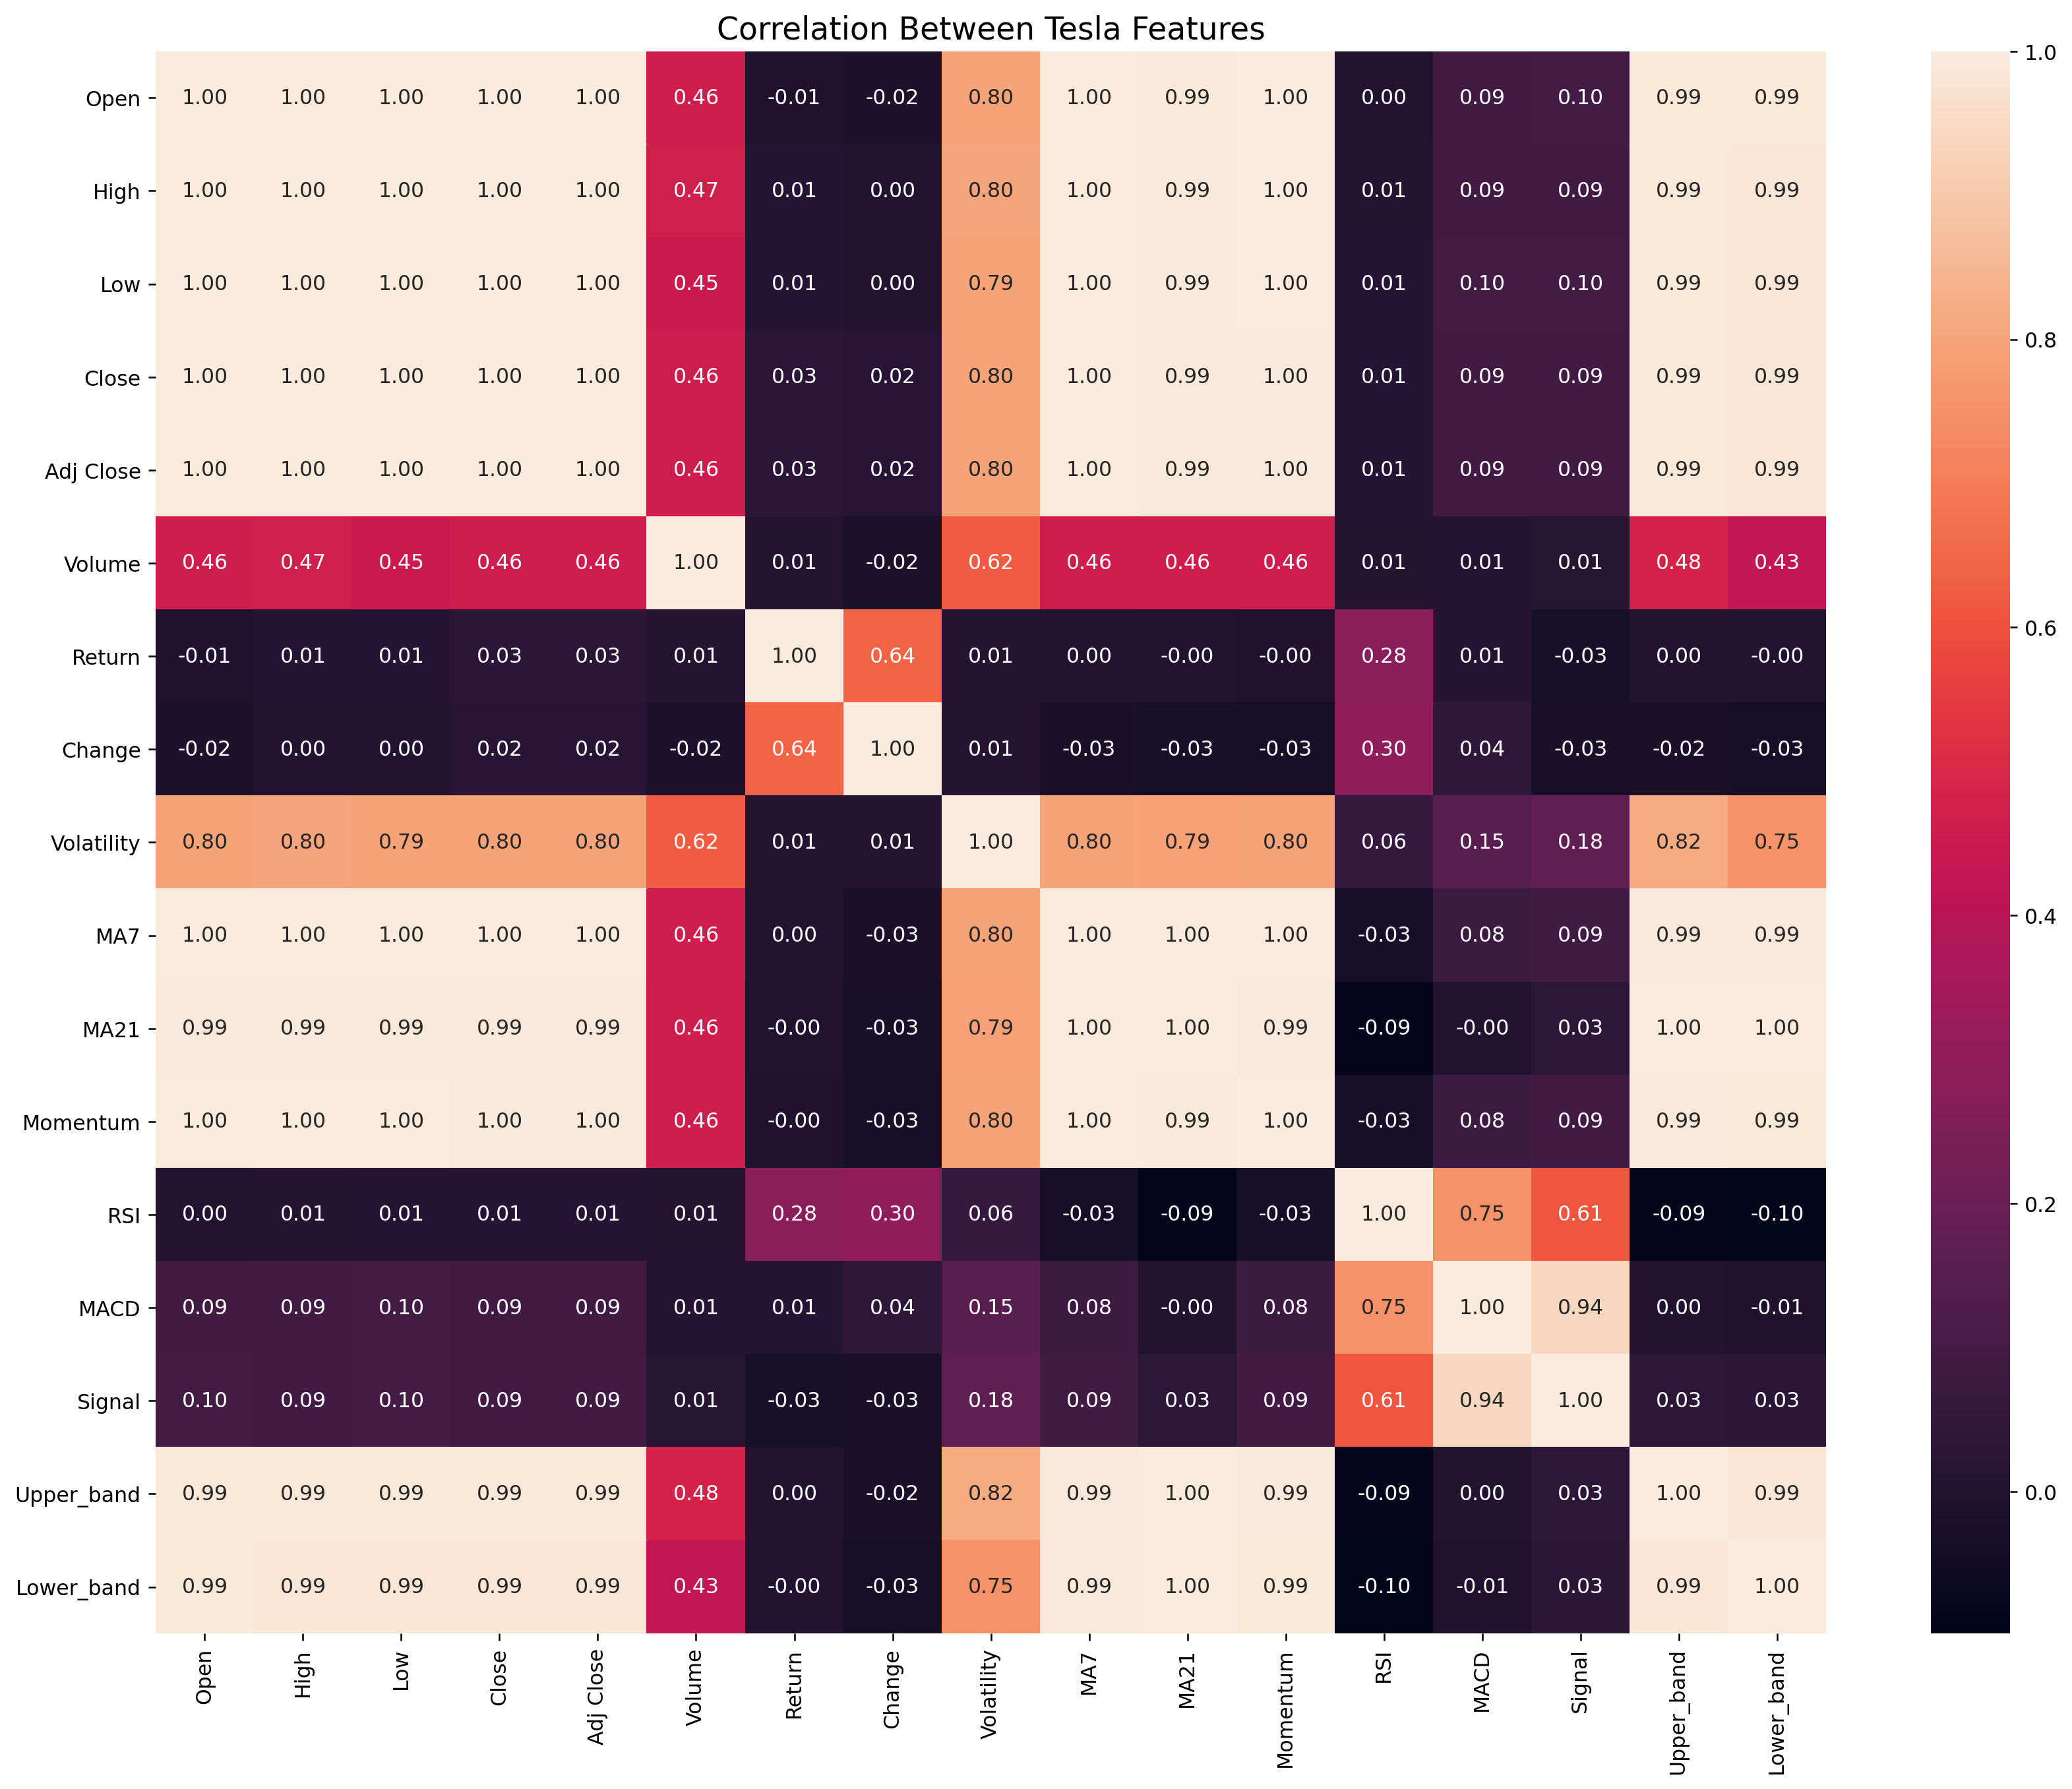

In [7]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(18,14))
sns.heatmap(stocks['tsla'].corr(), annot=True, fmt='.2f')
plt.ylim(17, 0)
plt.title('Correlation Between Tesla Features', fontSize=15)
plt.show()

### Bollinger Bands, RSI, MACD, Volume

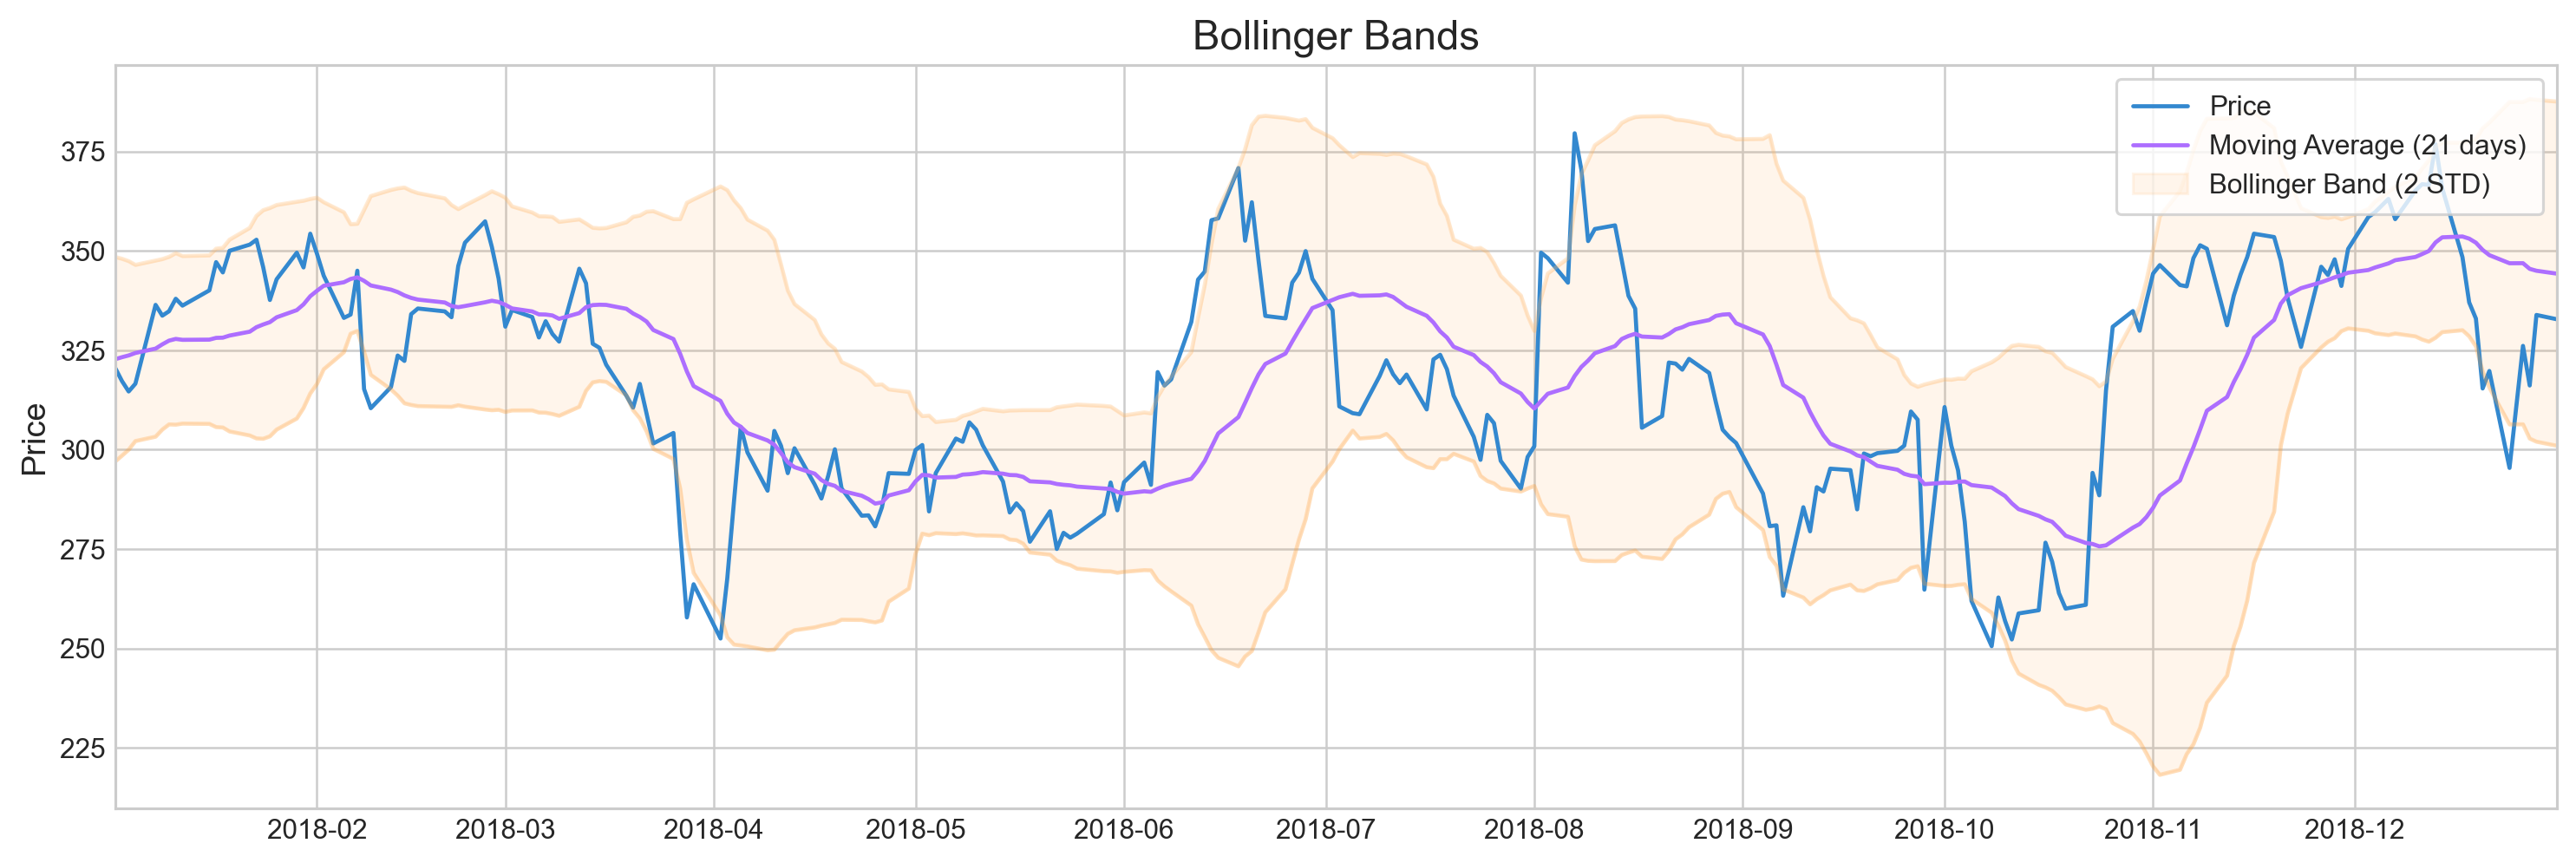

In [10]:
plotting.bollinger_bands(stocks['tsla'].loc['2018':'2018'])

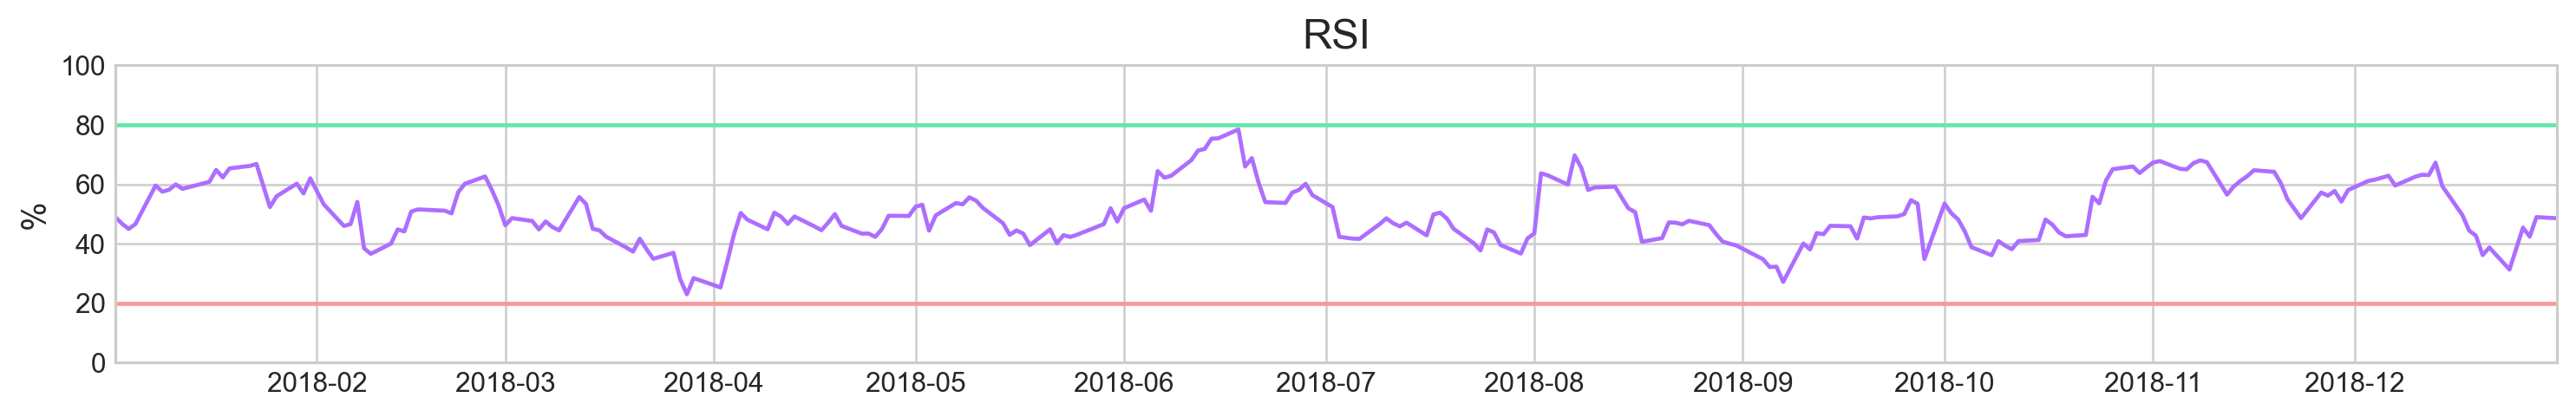

In [11]:
plotting.rsi(stocks['tsla'].loc['2018':'2018'])

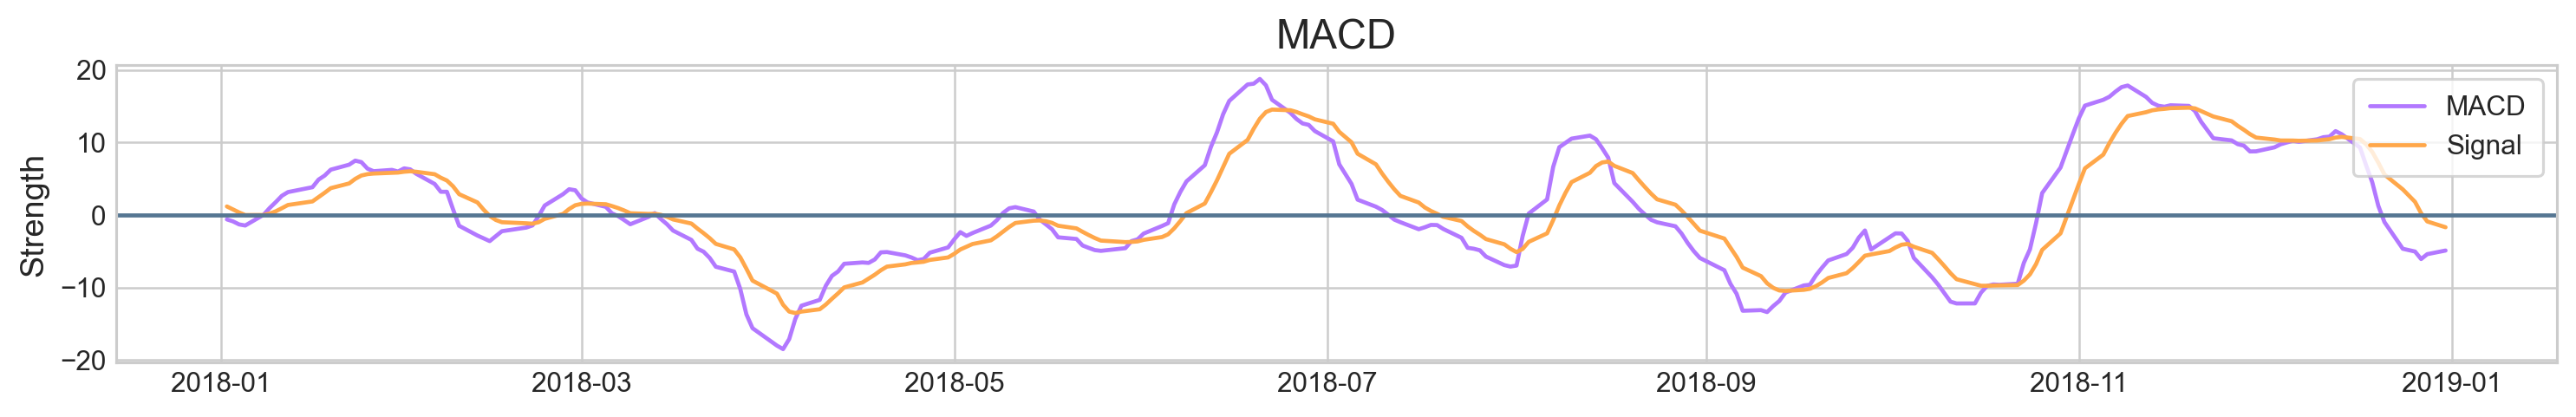

In [12]:
plotting.macd(stocks['tsla'].loc['2018':'2018'])

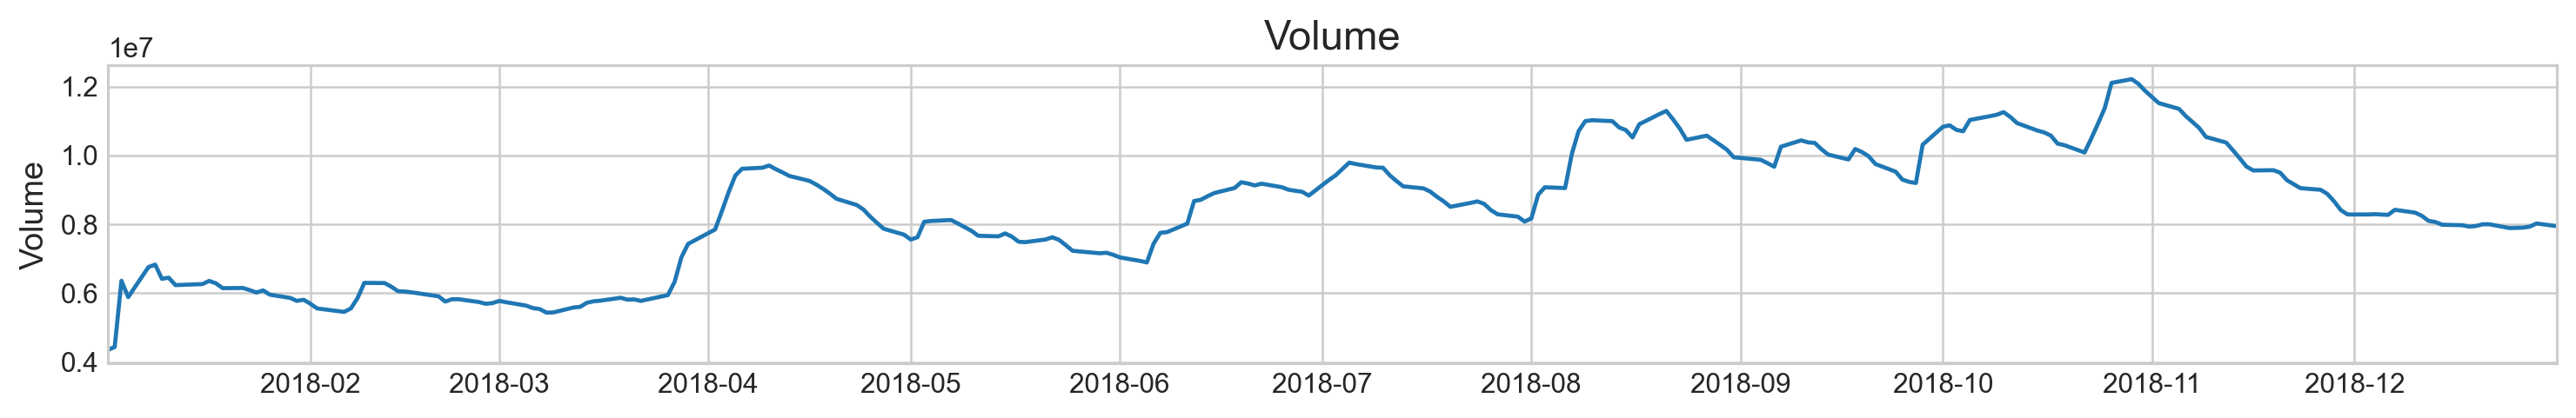

In [13]:
plotting.volume(stocks['tsla'].loc['2018':'2018'])

### Return by Month

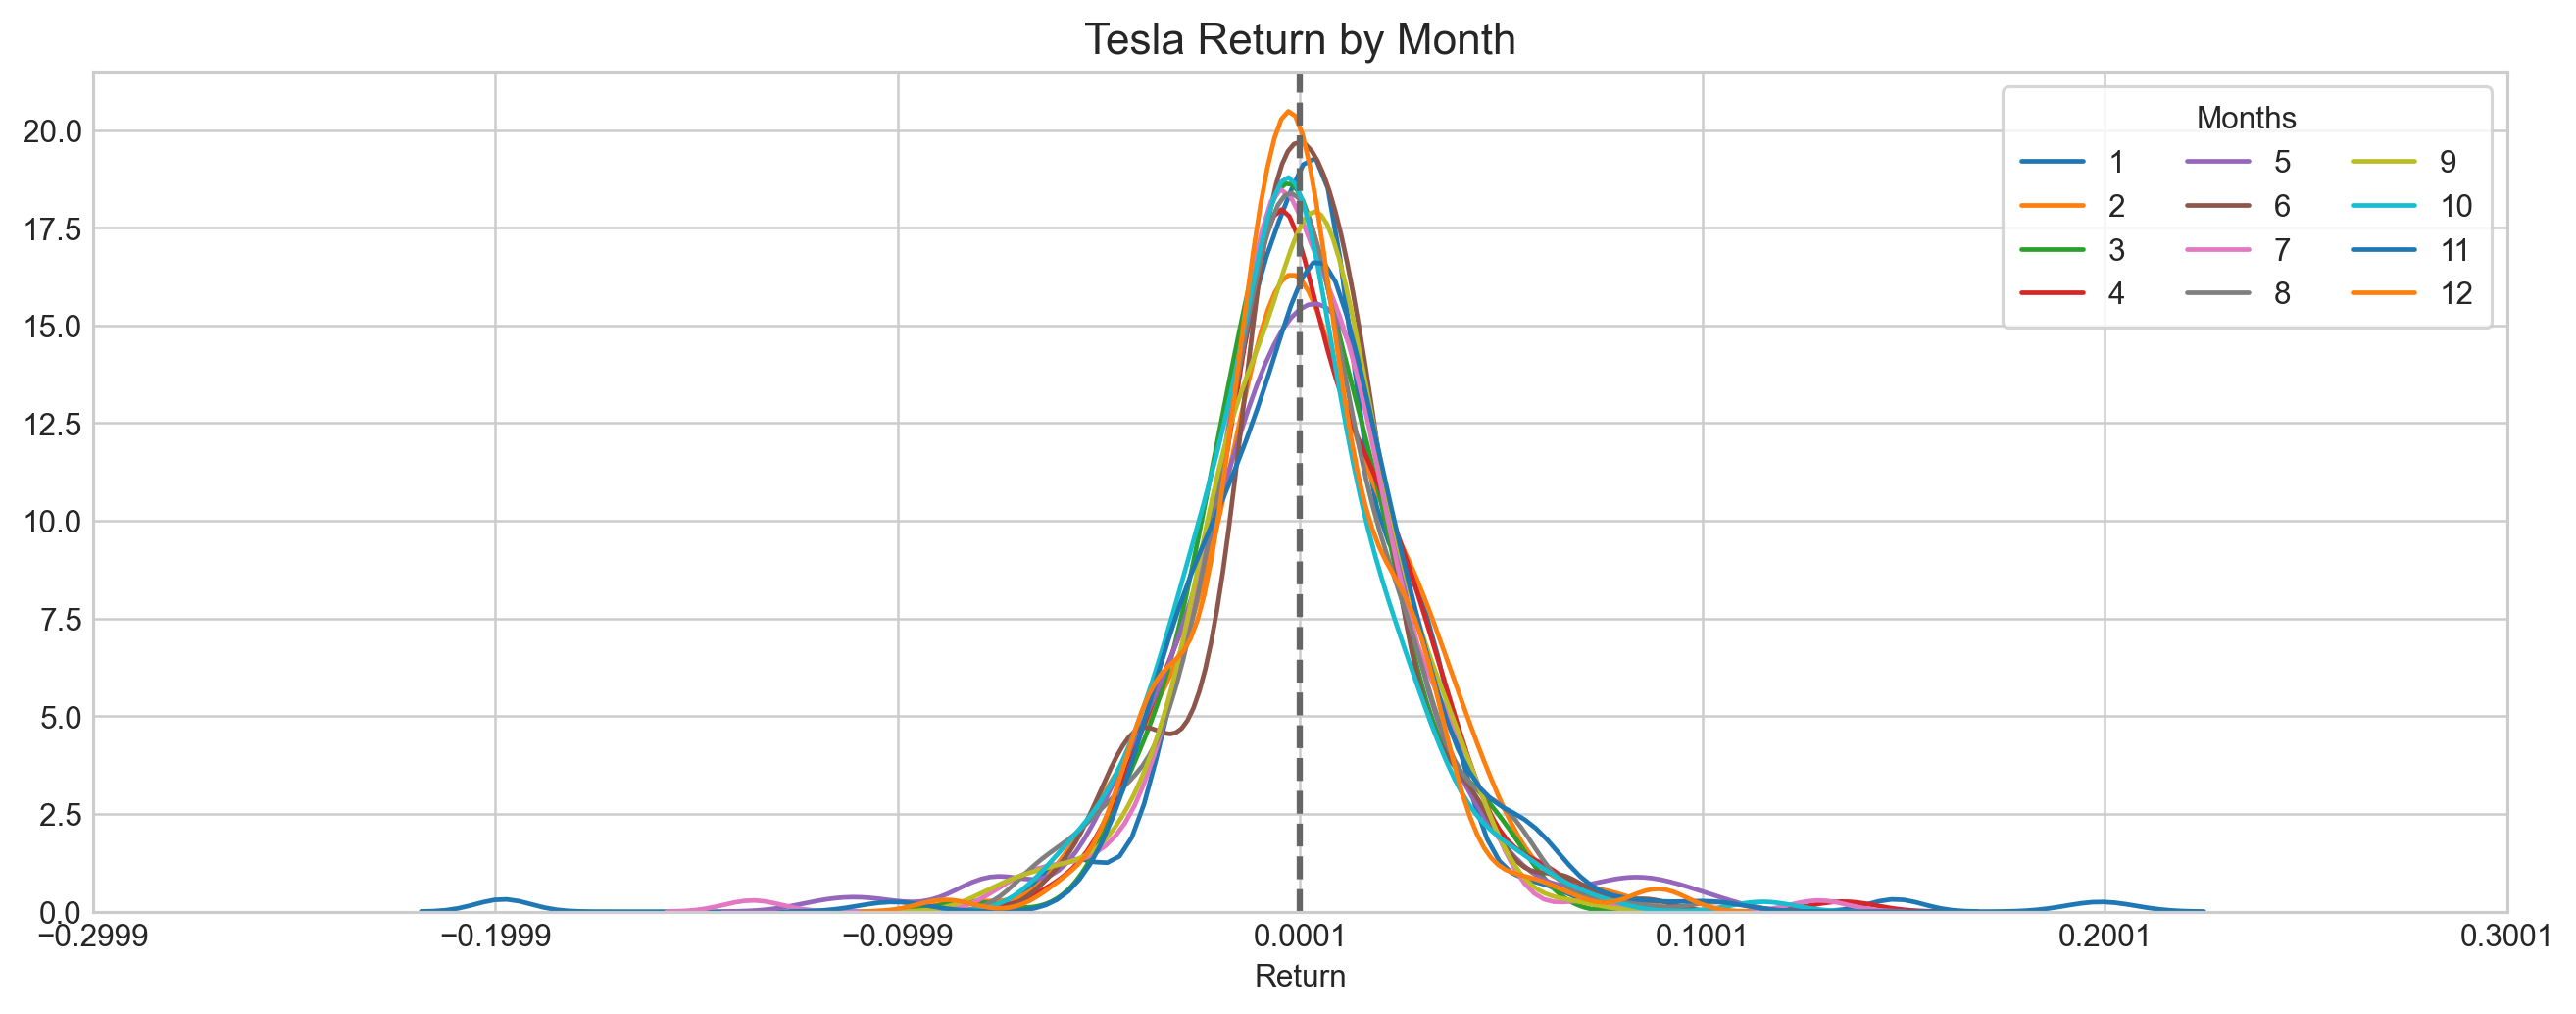

In [14]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = stocks['tsla'][stocks['tsla'].index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['tsla'].Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + stocks['tsla'].Return.mean())
plt.title('Tesla Return by Month', fontSize=14)
plt.show()

### Returns for Each Day of the Month

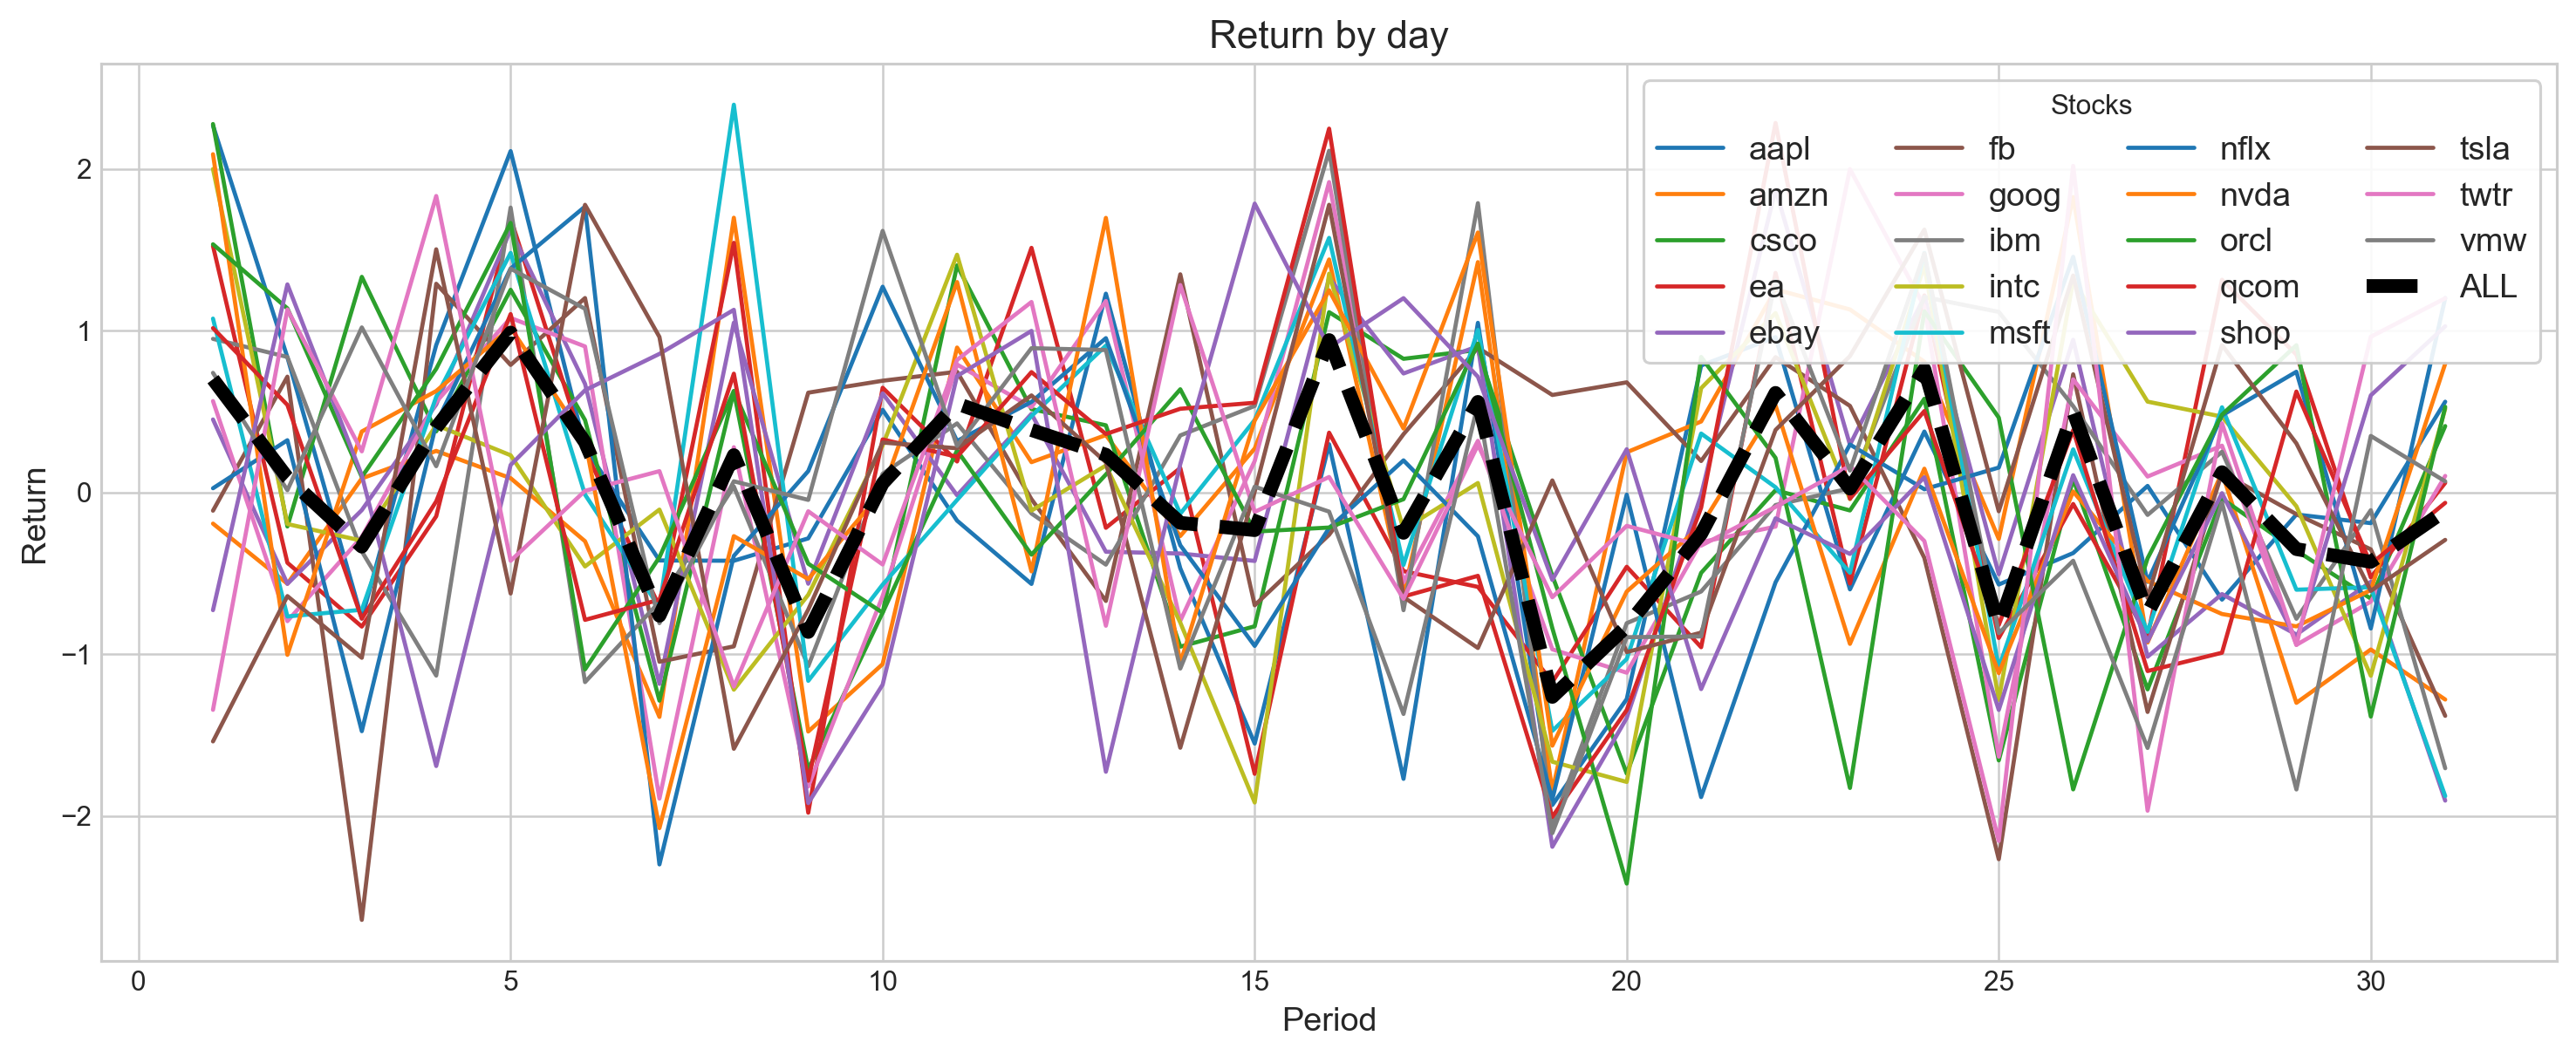

In [16]:
plotting.compare_stocks(stocks, value='Return', by='day', scatter=False)

### Returns for Each Month of the Year

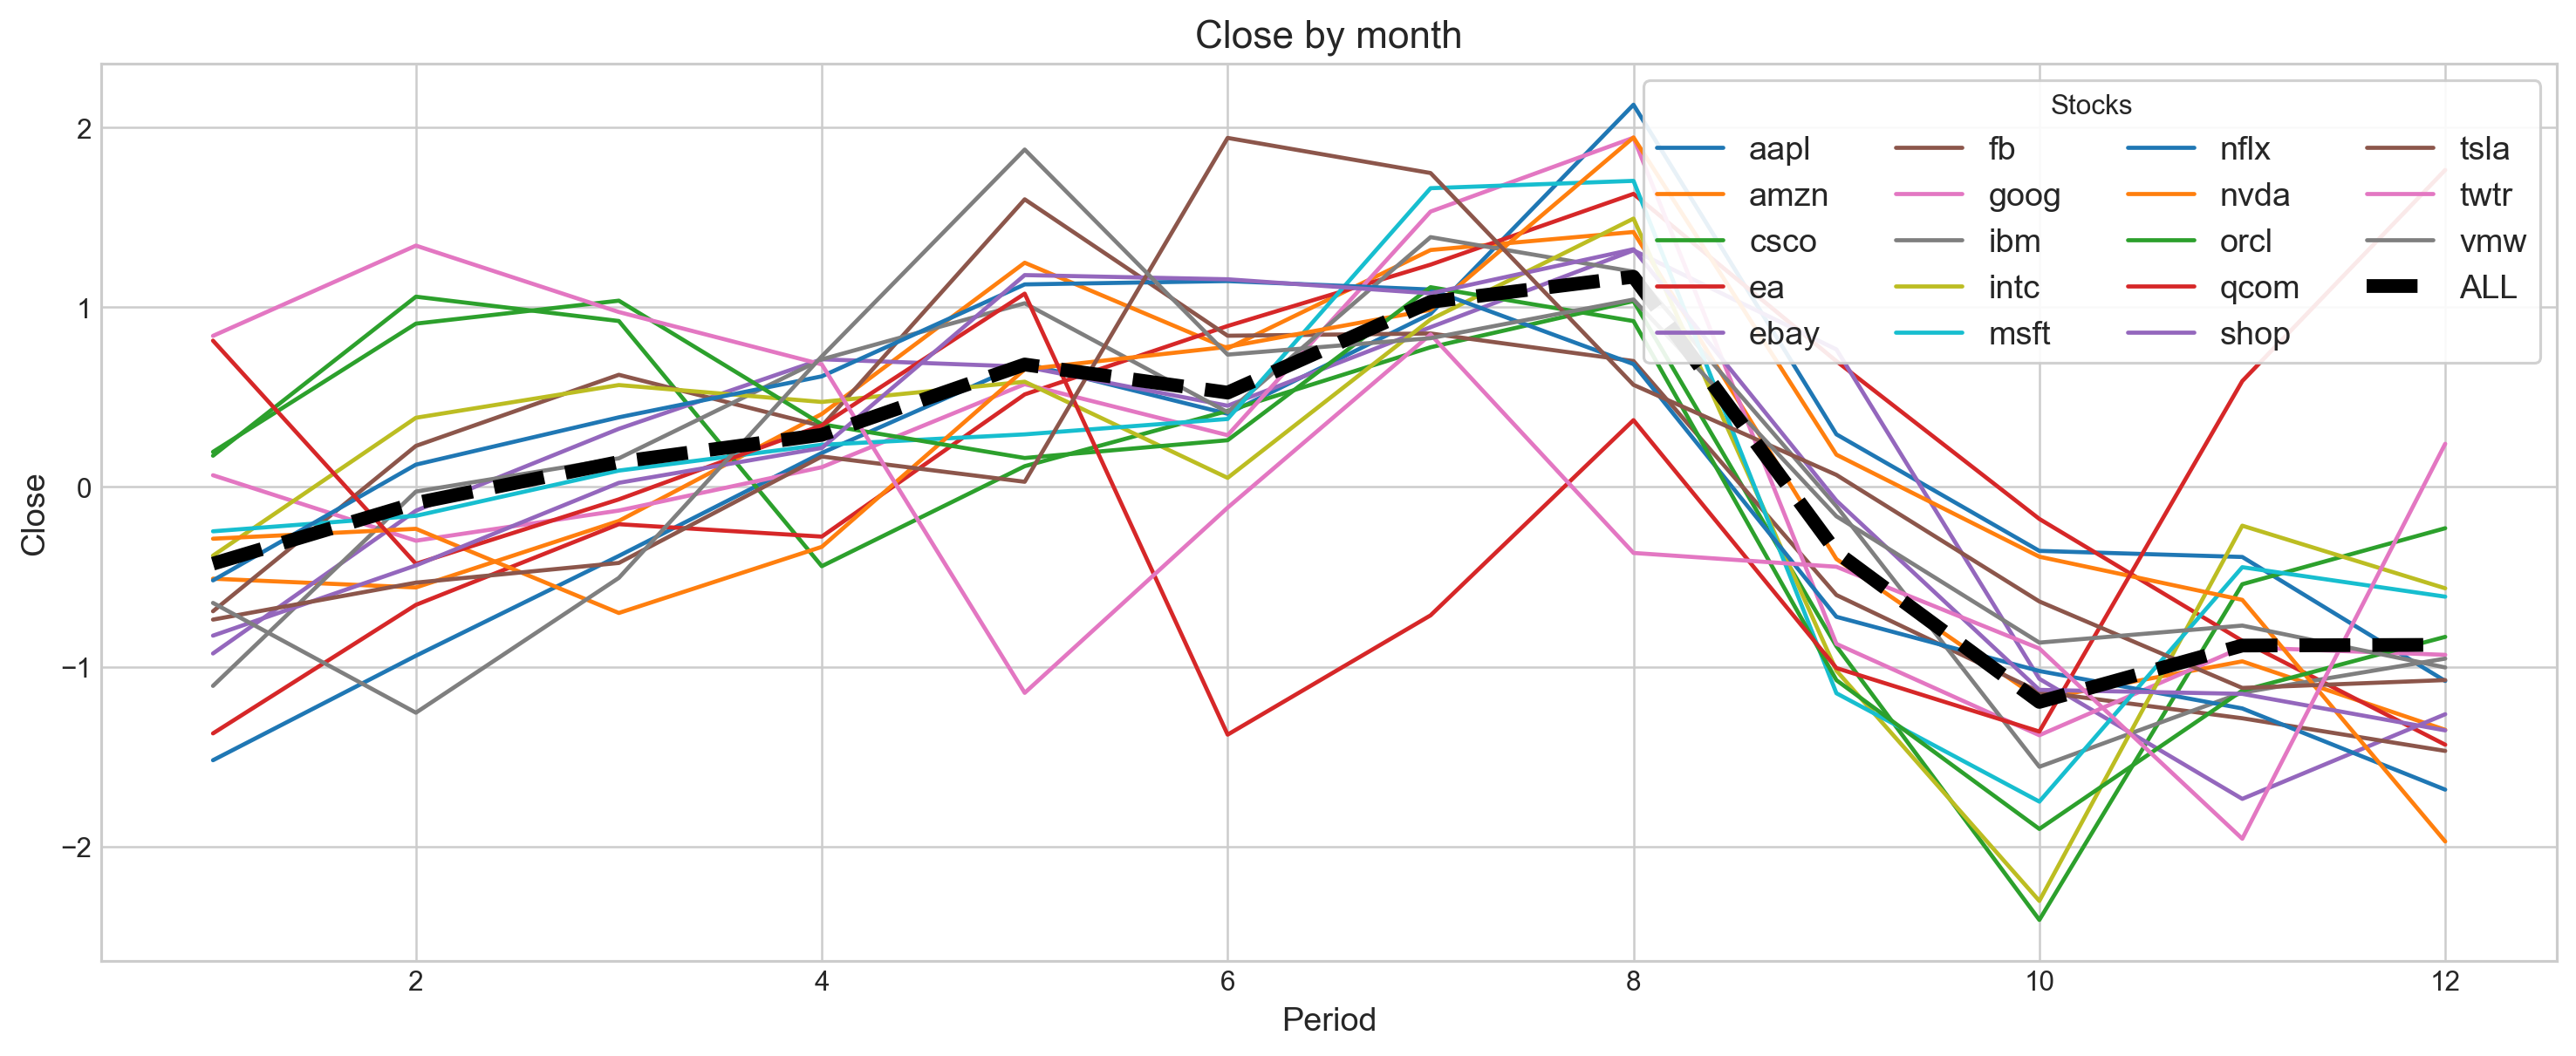

In [17]:
plotting.compare_stocks(stocks, value='Close', by='month', scatter=False)

### Combined Daily Return for Multiple Stocks

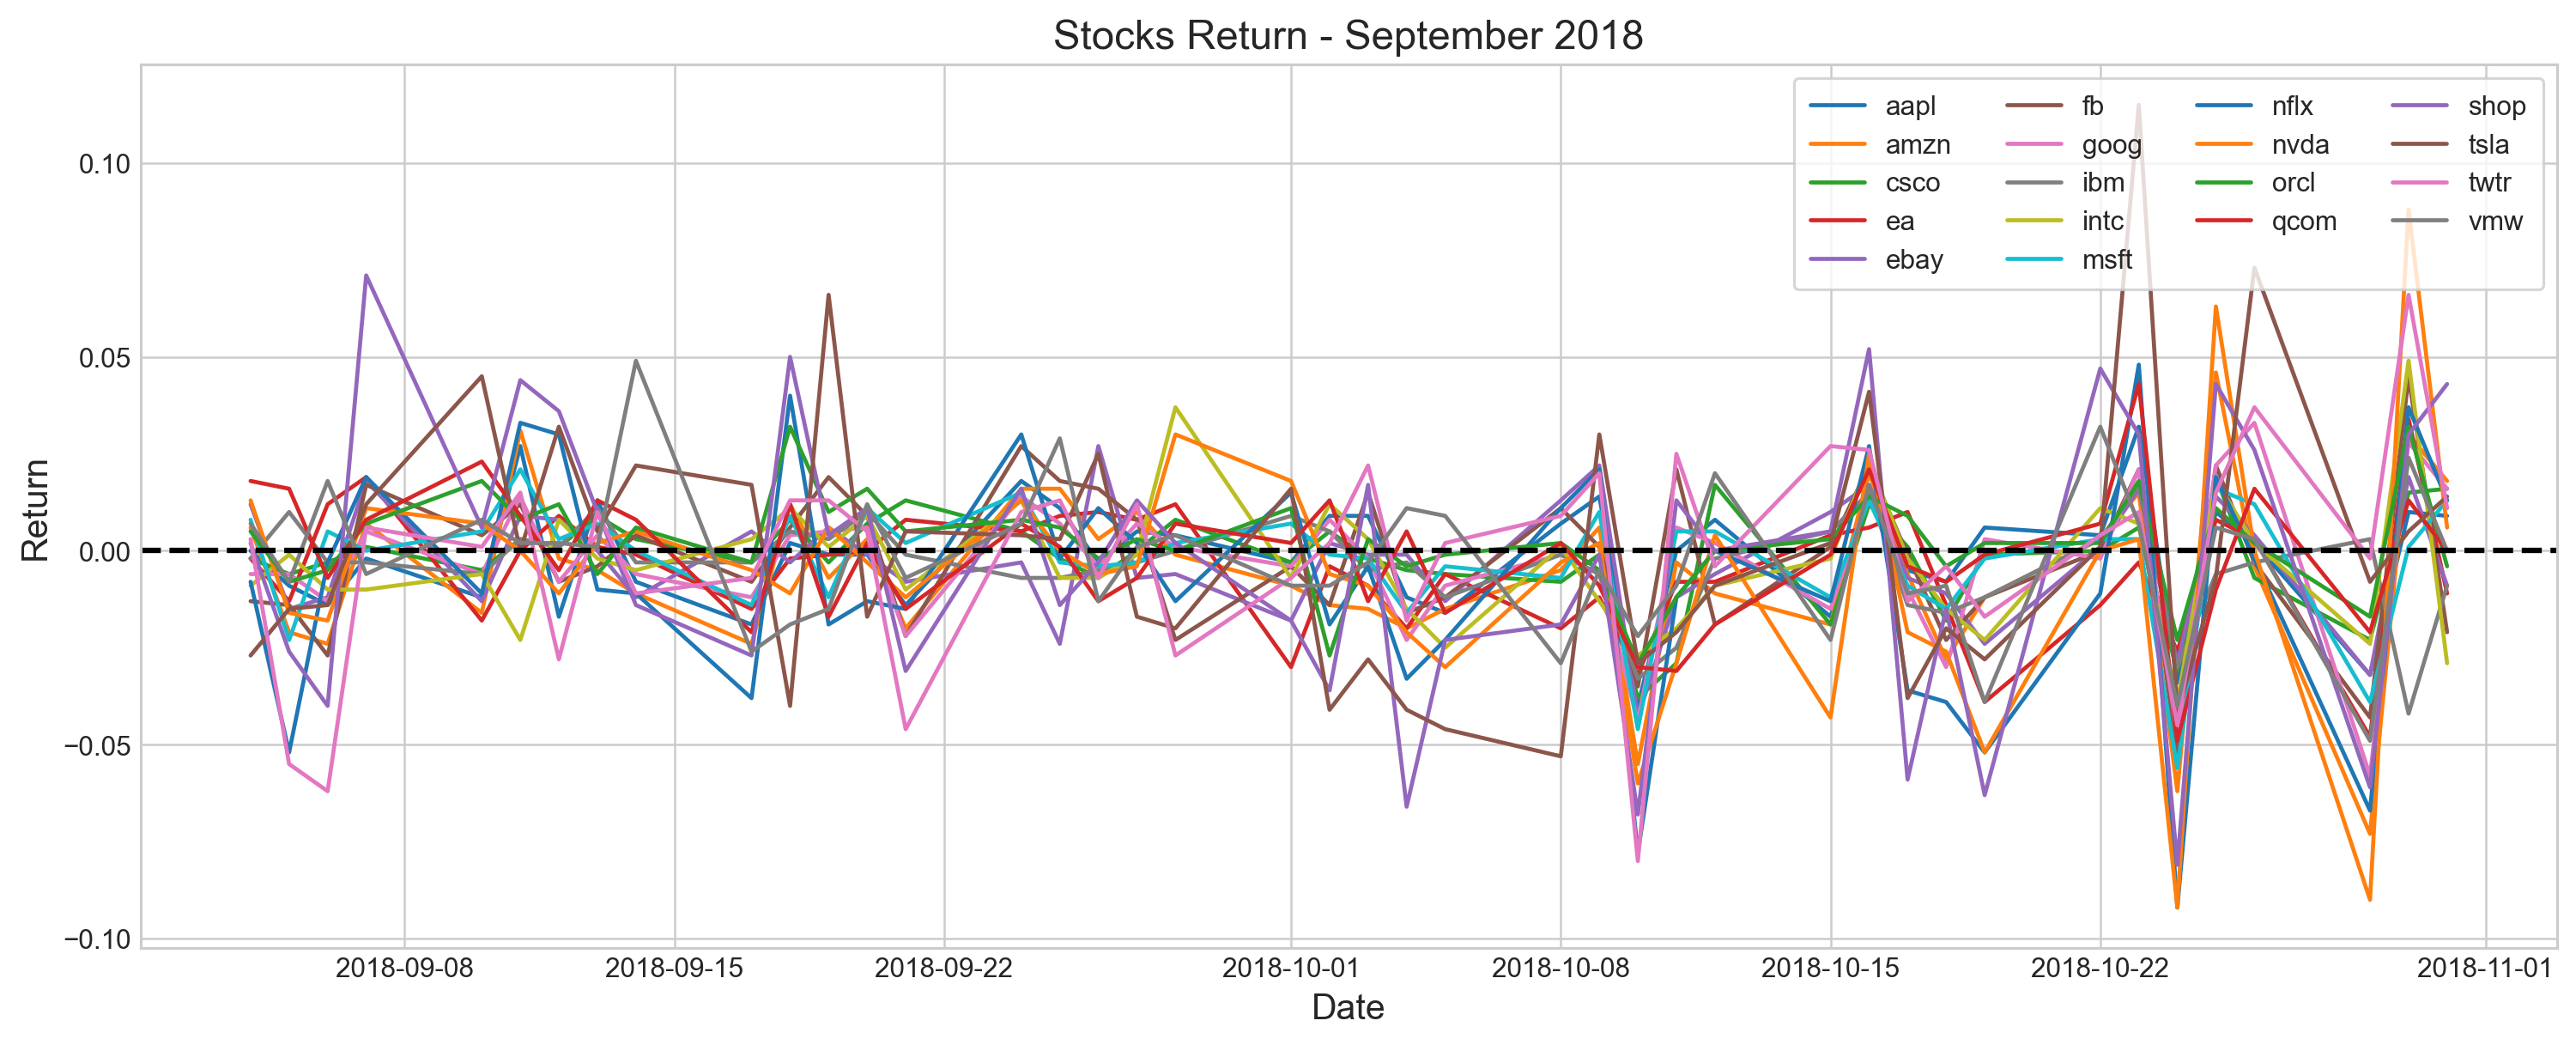

In [18]:
stocks_return_correlation = {}

plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:    
    stocks_return_correlation[i] = stocks[i].loc['2018-9':'2018-10'].Return
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2018', fontSize=15)
plt.xlabel('Date', fontSize=13)
plt.ylabel('Return', fontSize=13)
plt.axhline(0, c='k', lw=2, ls='--')
plt.show()

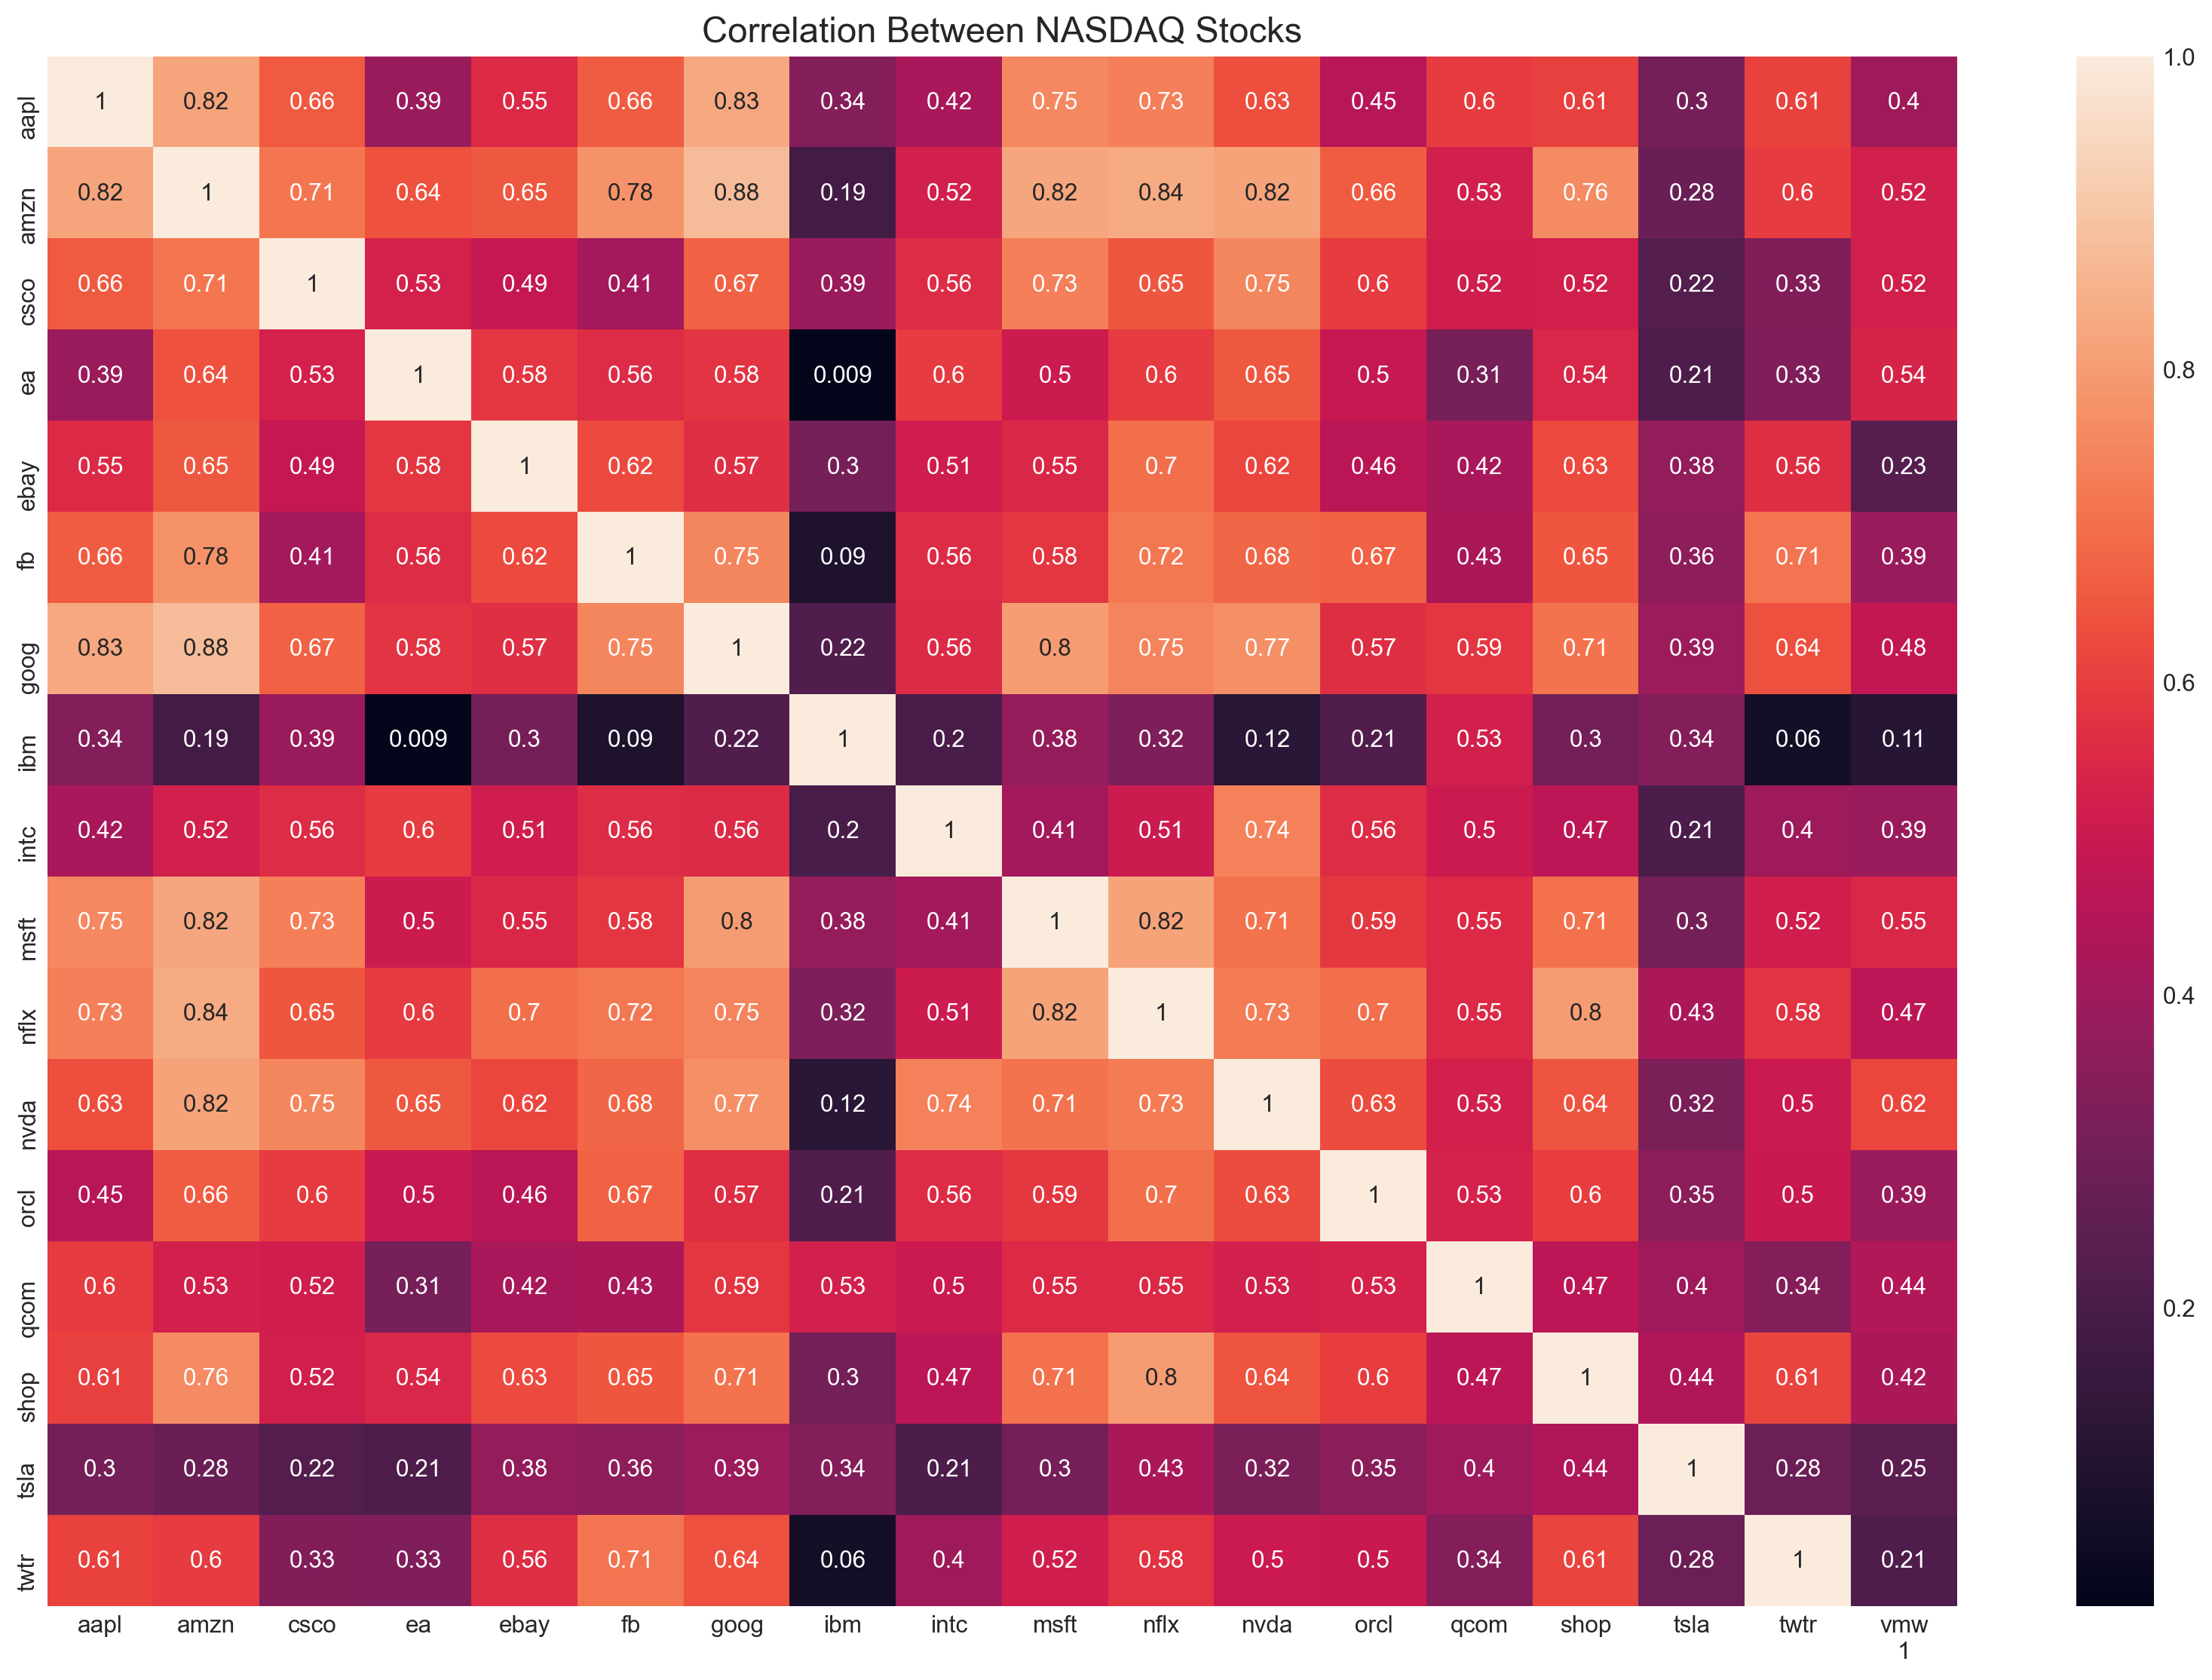

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(pd.DataFrame(stocks_return_correlation).corr(), annot=True)
plt.ylim(17, 0)
plt.title('Correlation Between NASDAQ Stocks', fontSize=15)
plt.show()

In [20]:
stocks_corr = {}

for i in stocks:
    stock1 = stocks[i].loc['2018':'2019'].Return
    c = {}
    for j in stocks:
        stock2 = stocks[j].loc['2018':'2019'].Return
        if i != j :
            c[j] = np.corrcoef(stock1, stock2)[0][1]
    m = max(c.items(), key=operator.itemgetter(1))
    stocks_corr[(i+"-"+m[0])] = [m[1]]

In [21]:
pd.DataFrame(stocks_corr).T.sort_values(by=0, ascending=False).head(10)

0
goog-amzn  0.794676
amzn-goog  0.794676
msft-goog  0.783769
csco-msft  0.735654
aapl-msft  0.731158
fb-goog    0.729484
nflx-amzn  0.723289
nvda-amzn  0.707795
orcl-msft  0.653197
shop-amzn  0.636029

### High-Low and Price

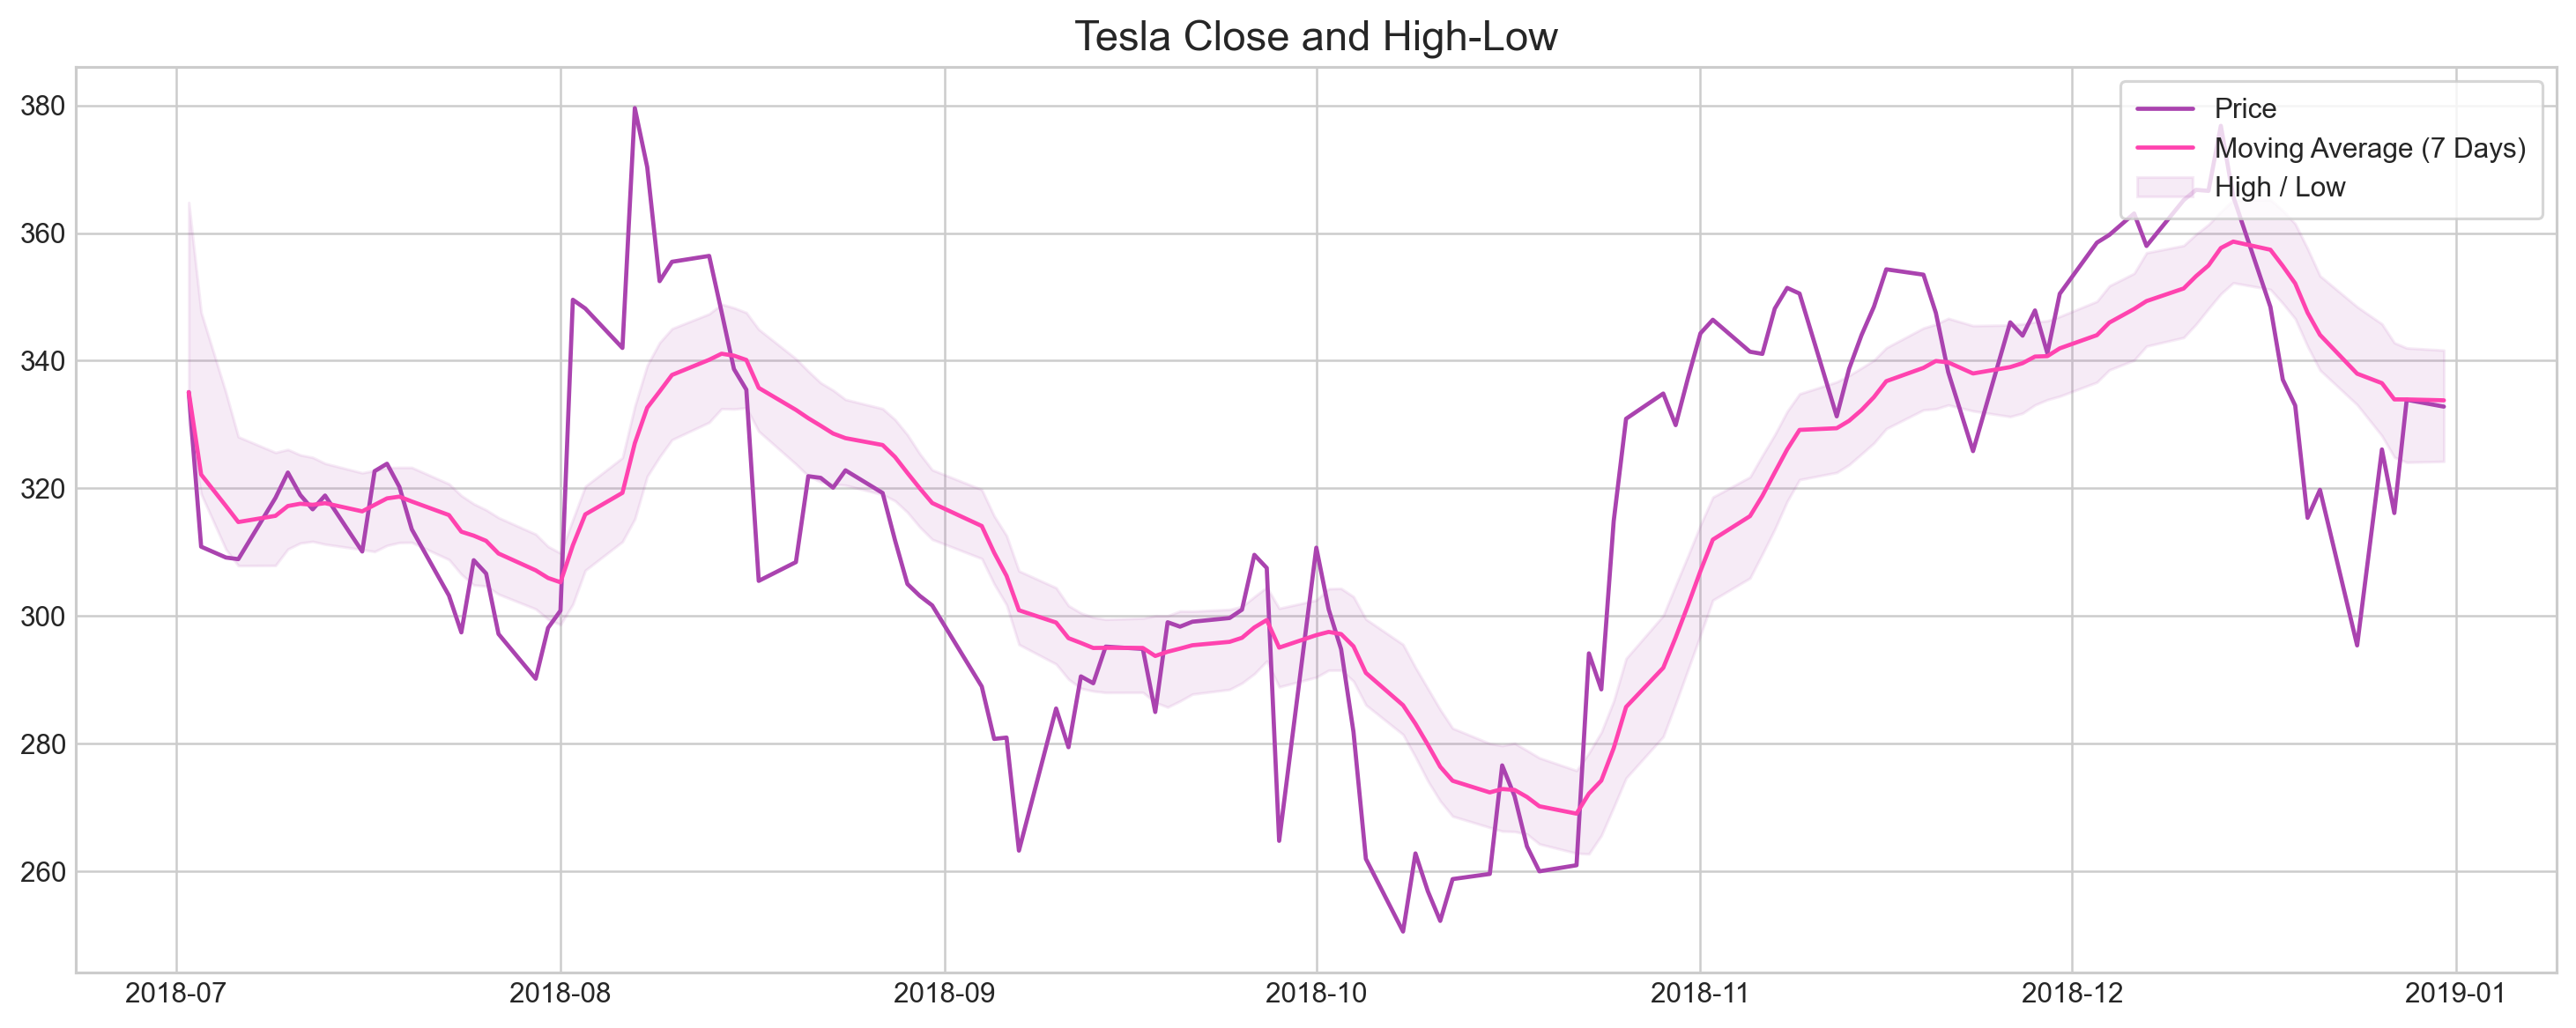

In [22]:
plt.figure(figsize=(16,6))

s = stocks['tsla'].loc['2018-7':'2018']
u = s.High.ewm(7).mean()
l = s.Low.ewm(7).mean()
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='Moving Average (7 Days)')
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.title('Tesla Close and High-Low', fontSize=15)
plt.show()

### Checking for Normality

Machine learning algorithms, including Neural Networks heavily rely on probability in learning process. Let's check target variable `Return` to normality.

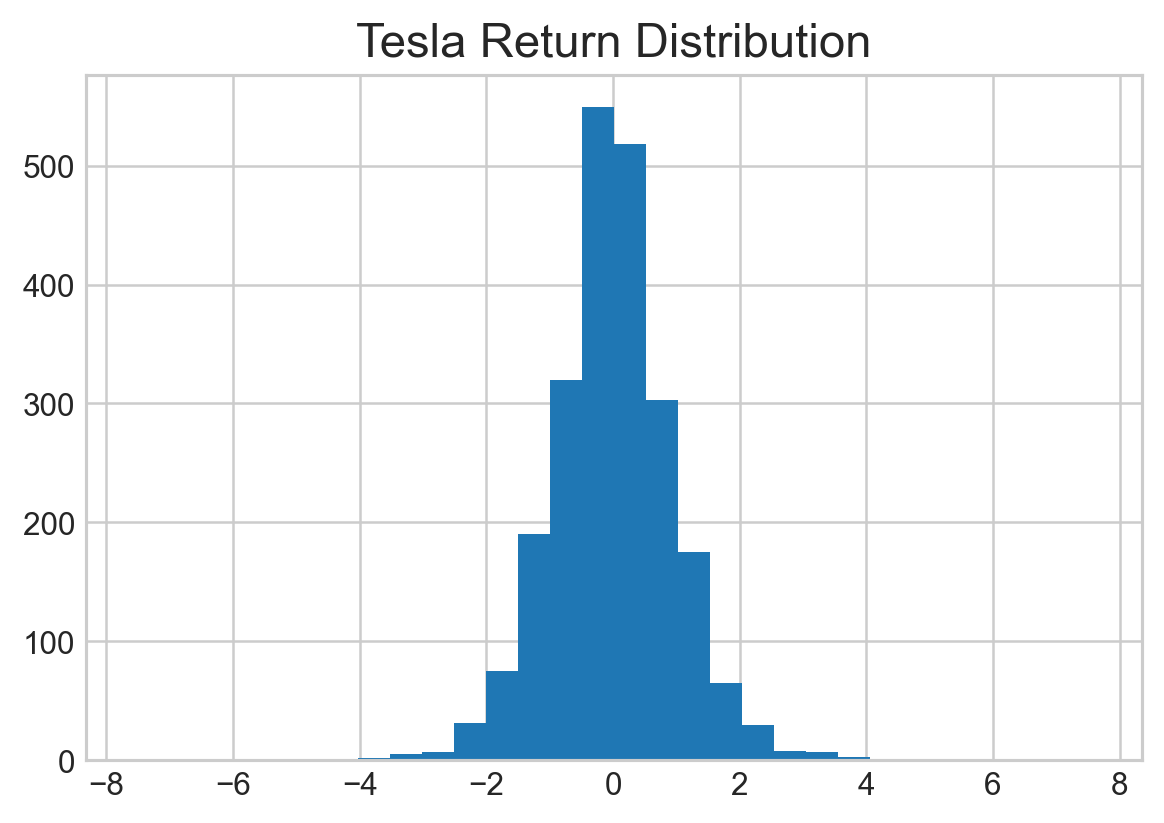

In [23]:
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(stocks['tsla'].Return), bins=30)
plt.title('Tesla Return Distribution', fontSize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

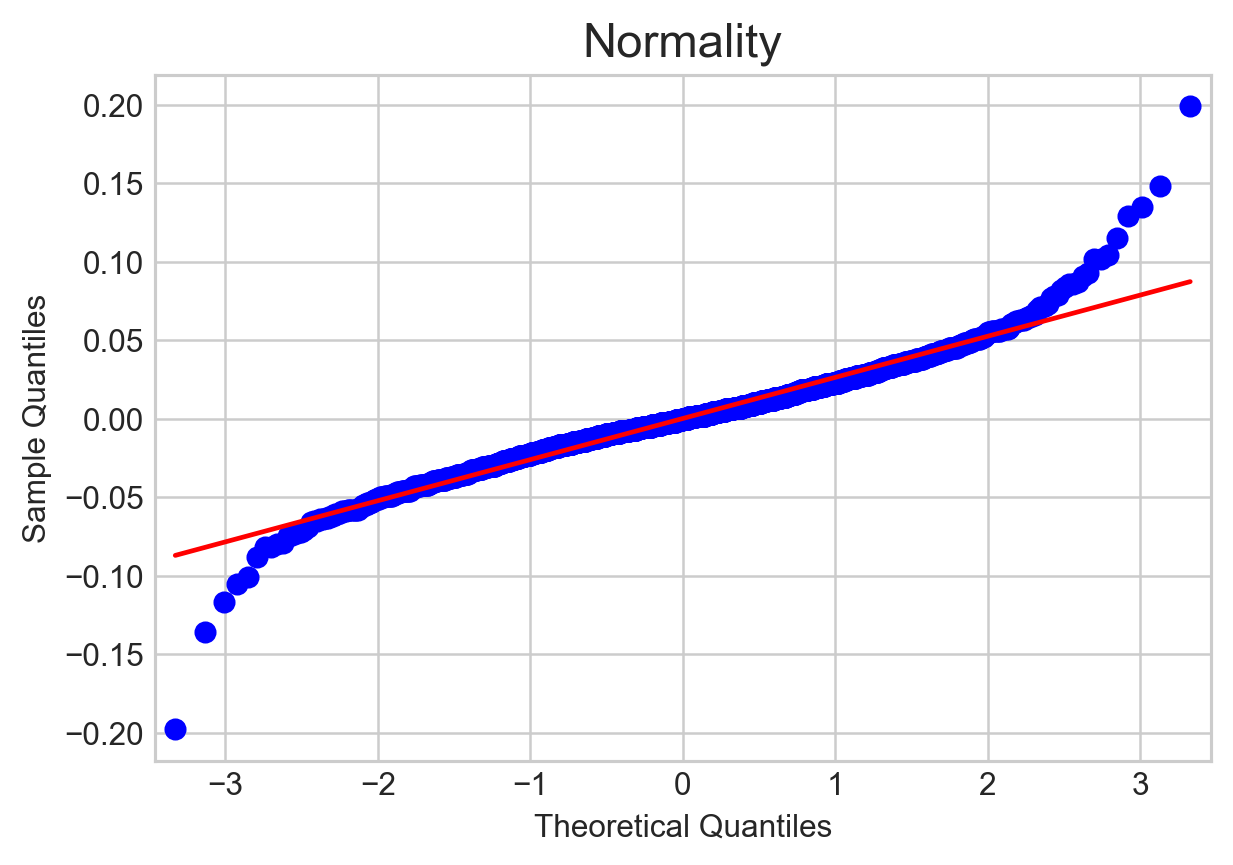

In [24]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(stocks['tsla'].Return, line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontSize=15)
plt.show()

# Conclusion

- `Return` has 64% correlation with `Change` feature. 
- `Close` value stays inside Bollinger Bands
- `Return` feature mostly normal